importing dependencies

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data collection and analysis

In [44]:
# loading data from csv file to pandas dataframe
df = pd.read_csv('/content/customer_churn.csv')
# loading data from csv file to pandas dataframe
# df = pd.read_csv('/content/mall_customers_data.csv')

show first 5 row in data frame


In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.shape

(7043, 21)

In [47]:
# information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:


df.isnull().sum().sum()

# if we do have missing value we use method like imputation to replace with suitable value

np.int64(0)

In [49]:
# #  we need these to columns { Annual Income (k$)	, Spending Score (1-100 }

# X = df.iloc[:,[3,4]].values

choosing the number of clusters


In [50]:
df.duplicated().sum()

np.int64(0)

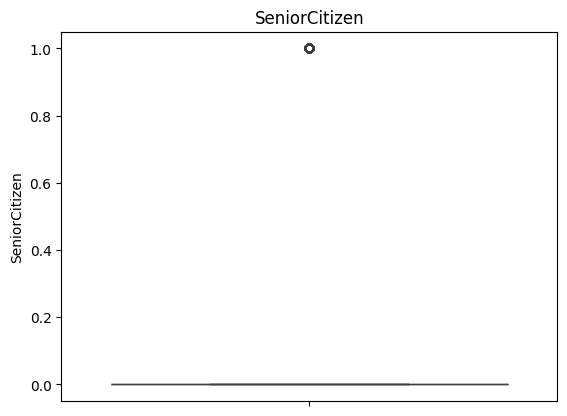

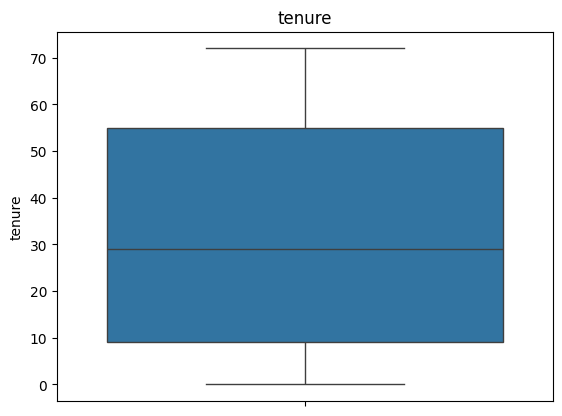

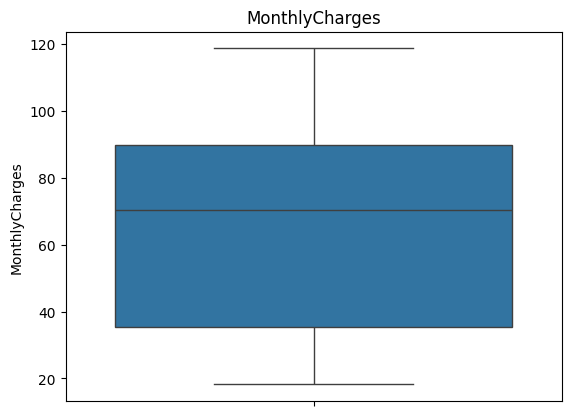

In [51]:
for col in df.columns:
  if(df[col].dtype!='object'):
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [52]:
from sklearn.preprocessing import LabelEncoder


In [53]:
le=LabelEncoder()  #label endoing used to assign unique integer values to the object values as ou rmodel is incapable of analysing the object(string) values

# df['gender']=le.fit_transform(df['gender'])  #male=1 female=0
for col in df.columns:
  df[col]=le.fit_transform(df[col])



In [54]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,2660,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customerID        7043 non-null   int64
 1   gender            7043 non-null   int64
 2   SeniorCitizen     7043 non-null   int64
 3   Partner           7043 non-null   int64
 4   Dependents        7043 non-null   int64
 5   tenure            7043 non-null   int64
 6   PhoneService      7043 non-null   int64
 7   MultipleLines     7043 non-null   int64
 8   InternetService   7043 non-null   int64
 9   OnlineSecurity    7043 non-null   int64
 10  OnlineBackup      7043 non-null   int64
 11  DeviceProtection  7043 non-null   int64
 12  TechSupport       7043 non-null   int64
 13  StreamingTV       7043 non-null   int64
 14  StreamingMovies   7043 non-null   int64
 15  Contract          7043 non-null   int64
 16  PaperlessBilling  7043 non-null   int64
 17  PaymentMethod     7043 non-null  

In [56]:
df_copy=df.copy()

In [57]:
df_copy.drop('customerID',axis=1,inplace=True)

In [58]:
df_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


In [59]:
# from sklearn.preprocessing import StandardScaler

In [60]:
# sc=StandardScaler()

# df_scaled=sc.fit_transform(df_copy)


In [61]:
# df_scaled

In [62]:
# df_scaled_table=pd.DataFrame(df_scaled,columns=df_copy.columns)

In [63]:
# df_copy.columns

In [64]:
# df_scaled_table

In [65]:
from sklearn.cluster import KMeans

In [66]:
model = KMeans(n_clusters=3)

In [67]:
model.fit(df_copy)

KMeans(n_clusters=3)

In [68]:
model.labels_

array([2, 1, 1, ..., 2, 2, 0], dtype=int32)

In [69]:
df['Clusters']=model.labels_

In [70]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Clusters
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,142,2505,0,2
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,498,1466,0,1
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,436,157,1,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,266,1400,0,1
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,729,925,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,1,1,3,991,1597,0,1
7039,1525,0,0,1,1,72,1,2,1,0,...,0,2,2,1,1,1,1340,5698,0,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,1,2,137,2994,0,2
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,1,3,795,2660,1,2


In [71]:
n=[2,3,4,5,6,7,8,9,10]

In [72]:
ssd=[]
for k in n:
  temp_model=KMeans(n_clusters=k,max_iter=150,random_state=32)
  temp_model.fit(df_copy)
  ssd.append(temp_model.inertia_) #sum of squared distances between each data point and its assigned cluster centroid

In [73]:
ssd

[7673576832.29611,
 4231095287.652471,
 3032155413.4778767,
 2460867115.157661,
 2120670300.5986745,
 1941430866.324421,
 1616185525.1419075,
 1422045628.5179508,
 1266325541.051459]

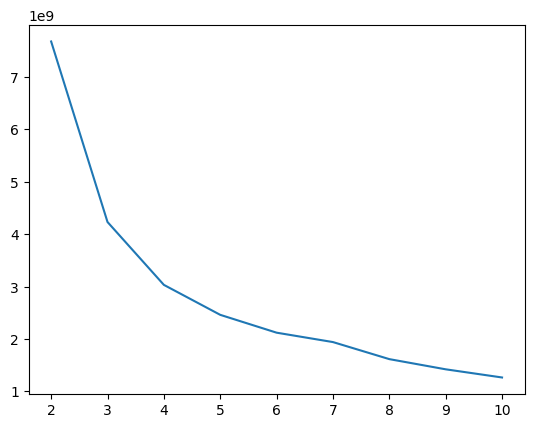

In [74]:
plt.plot(n,ssd)

In [75]:
final_model=KMeans(n_clusters=4,max_iter=150,random_state=32)
final_model.fit(df_copy)

KMeans(max_iter=150, n_clusters=4, random_state=32)

In [76]:
final_model.labels_

array([3, 0, 0, ..., 3, 3, 1], dtype=int32)

In [77]:
df['Clusters']=final_model.labels_

In [78]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Clusters
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,142,2505,0,3
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,498,1466,0,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,436,157,1,0
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,266,1400,0,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,729,925,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,1,1,3,991,1597,0,0
7039,1525,0,0,1,1,72,1,2,1,0,...,0,2,2,1,1,1,1340,5698,0,1
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,1,2,137,2994,0,3
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,1,3,795,2660,1,3


In [79]:
group1=df[df['Clusters']==0]
group1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Clusters
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,498,1466,0,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,436,157,1,0
3,5535,1,0,0,0,45,0,1,0,2,...,2,0,0,1,0,0,266,1400,0,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,2,729,925,1,0
6,1002,1,0,0,1,22,1,2,1,0,...,0,2,0,0,1,1,1075,1550,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,3375,0,0,0,0,51,1,0,2,1,...,1,1,1,2,0,0,42,40,0,0
7025,1945,0,0,0,0,18,1,2,1,0,...,2,0,2,0,1,0,1189,1166,0,0
7035,5995,1,0,0,0,19,1,0,1,0,...,0,2,0,0,1,0,874,892,0,0
7037,1758,0,0,0,0,72,1,0,2,1,...,1,1,1,2,1,0,52,770,0,0


In [80]:
group2=df[df['Clusters']==1]
group3=df[df['Clusters']==2]
group4=df[df['Clusters']==3]

In [81]:
df_short=df.iloc[:500,:]

In [82]:
df_short.shape

(500, 22)

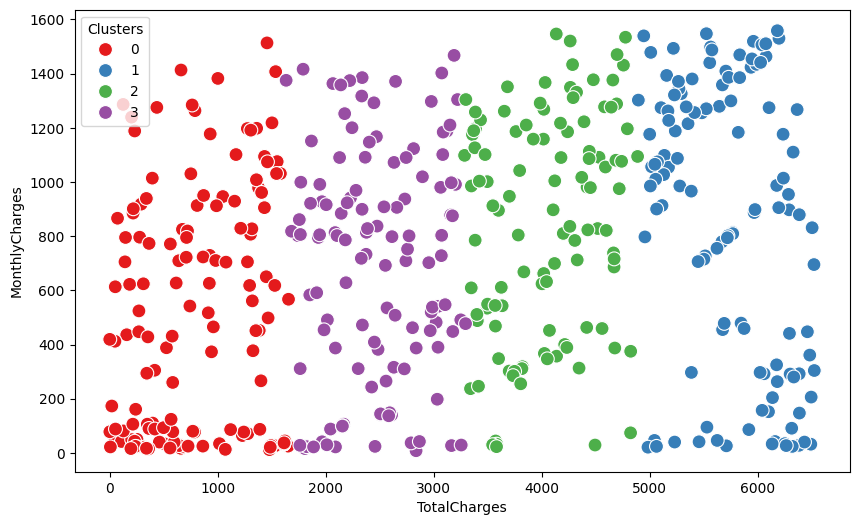

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_short,x='TotalCharges',y='MonthlyCharges',hue='Clusters',palette='Set1',s=100)
plt.show()

In [84]:
import plotly.express as px

# Create a 3d scatter plot
fig = px.scatter_3d(df_short , x="TotalCharges" , y="MonthlyCharges" , z="tenure" ,color="Clusters" ,hover_name = "Clusters" , title ="3D Scatter plot of customer segmentation " )

# Update layout for better visulization

fig.update_layout( scene = dict( xaxis_title="TotalCharges" , yaxis_title="MonthlyCharges" , zaxis_title="Tenure"), width = 800 , height = 600)

fig.show()